In [3]:
# the environmental set up: under python 3.6 with anaconda
# all the codes a docummented in jupytor notebok

#from the command line

# 1.having sklearn package ---> pip install sklearn 
# 2.having seaborn package ---> pip install seaborn
# 3.having pandas package ---> pip install pandas
# 4.having numpy package ---> pip install numpy
# 5.having matplotlib package ---> pip install matplotlib

# content

## 1. import the data and data cleaning and grouping
   ### 1.1 select the needed column
   ### 1.2 relabel the educational data
   ### 1.3 relabel the attitude towards immigration
   ### 1.4 country grouping
## 2. building the linear model
   ### 2.1 linear model on overall selected european countries dataset
   ### 2.2 linear model on diiferent regions in Europe
## 3. using the maching learning methods for model predictions and export the cleaned data
   ### 3.1 model prediction on overall selected european countries dataset
   ### 3.2 model prediction on different regions in Europe
## 4. Charts
   
   
   
   
   
   
   


# ——————————————————————————————————————

## ---1. import the data and data cleaning and grouping
### --------- 1.1 select the needed column with control variables

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# read the csv data file
dfall = pd.read_csv('ess round8.csv',encoding = "ISO-8859-1")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (6,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,115,116,117,118,119,120,121,122,123,124,125,126,127,128,131,132,133,134,135,136,137,138,139,140,141,142,143,144,164,176,245,246,248,249,250,251,252,259,260,261,262,263,264,265,266,272,273,274,275,276,277,283,284,285,286,287,288,291,292,298,299,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,519,520,521,522,523,524,525,526,527,528,529) h

In [6]:
# get the head of the dataset
dfall.head()

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,...,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,dweight,pspwght,pweight
0,ESS8e02_1,8,2.1,01.12.2018,1,AT,120,Most days,180,8,...,37,5,12,2016,8,33,50.0,0.611677,1.178496,0.370393
1,ESS8e02_1,8,2.1,01.12.2018,2,AT,120,Every day,120,6,...,39,25,11,2016,11,10,86.0,1.223354,0.899472,0.370393
2,ESS8e02_1,8,2.1,01.12.2018,4,AT,30,Only occasionally,Not applicable,5,...,17,22,11,2016,18,0,38.0,0.389058,0.315753,0.370393
3,ESS8e02_1,8,2.1,01.12.2018,6,AT,30,Every day,120,6,...,9,11,10,2016,19,59,46.0,0.642594,0.472467,0.370393
4,ESS8e02_1,8,2.1,01.12.2018,10,AT,30,Every day,180,5,...,31,1,12,2016,11,49,70.0,3.432402,2.246706,0.370393


In [7]:
#----------ABOUT THE SURVEY DATA--------------------

#'name' --name of the dataset
#'essround' -- the round of the survey
#'edition' -- the edition of the survey
#'cntry' -- the survey country

#----------ABOUT THE CONTROLED VARIABLES------------
#'gndr' -- gender of the respondent
#'yrbrn' -- the year the respondent was born
#'rlgblg' -- does the respondent believe in certain religion?
#'ctzcntr' -- Are you a citizen of [country]?

#----------ABOUT EDUCATION--------------------------

#'edulvlb' -- Highest level of education
#'edulvlfb' -- Father's highest level of education
#'edulvlmb' -- Mother's highest level of education

#----------ABOUT ATTITUDE TOWARDS IMMIGRANTS--------

#'imsmetn' -- Allow many/few immigrants of the same race/ethnic group as the majority
#'impcntr' -- Allow many/few immigrants from poorer countries outside Europe
#'imbgeco' -- Immigration bad or good for the country's economy
#'imueclt' -- Country's cultural life undermined or enriched by immigrants
#'imwbcnt' -- Immigrants make a country worse or better place to live

#select the need columns
df_temp = dfall[['name','essround','edition','cntry','gndr','yrbrn','rlgblg','ctzcntr','edulvlb', 'edulvlfb', 'edulvlmb',
'imsmetn', 'impcntr', 'imbgeco', 'imueclt', 'imwbcnt']]
#get the head of the dataset
df_temp.head()

,name,essround,edition,cntry,gndr,yrbrn,rlgblg,ctzcntr,edulvlb,edulvlfb,edulvlmb,imsmetn,impcntr,imbgeco,imueclt,imwbcnt
0,ESS8e02_1,8,2.1,AT,Female,1982,No,No,"ISCED 5A long, master/equivalent from upper/si...","ISCED 5A medium, bachelor/equivalent from lowe...","ISCED 5A medium, bachelor/equivalent from lowe...",Allow many to come and live here,Allow many to come and live here,Good for the economy,Cultural life enriched,Better place to live
1,ESS8e02_1,8,2.1,AT,Male,1964,No,No,"General ISCED 3A, access upper tier ISCED 5A/a...","General/pre-vocational ISCED 2A/2B, access ISC...","ISCED 1, completed primary education",Allow many to come and live here,Allow many to come and live here,8,8,5
2,ESS8e02_1,8,2.1,AT,Female,1948,Yes,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...","ISCED 1, completed primary education",Allow some,Allow a few,5,5,4
3,ESS8e02_1,8,2.1,AT,Male,1962,Refusal,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",Don't know,Don't know,7,7,Better place to live
4,ESS8e02_1,8,2.1,AT,Female,1996,Yes,No,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","General ISCED 3A, access upper tier ISCED 5A/a...",Not completed ISCED level 1,Allow some,Allow many to come and live here,2,5,5


In [8]:
#select the respondents that have the citizenship of the country
df_temp =df_temp[df_temp['ctzcntr'] == 'Yes']

In [9]:
#get the age of each respondents
lst = df_temp['yrbrn'].tolist()
yrbrn = []
for i in lst:
    try :
        yrbrn.append(2019- int(i))
    except:
        yrbrn.append(np.nan)
        
df_temp['age'] = yrbrn

In [10]:
#get the gender into dummy variables
def gen(string):
    if string == 'Male':
        return 1
    elif string == 'Female':
        return 0
    else:
        return np.nan
df_temp['gndr'] = df_temp['gndr'].apply(gen)

In [11]:
#get the gender into dummy variables
def rel(string):
    if string == 'Yes':
        return 1
    elif string == 'No':
        return 0
    else:
        return np.nan
df_temp['rlgblg'] = df_temp['rlgblg'].apply(rel)

In [12]:
df_temp.dropna(inplace = True)

### ---------1.2 relabel the educational data

In [13]:
#get the occurance of each country
df_temp['cntry'].value_counts()
#'IL','RU','CZ','LT','EE','PL','HU','SI' stands for 
#Israel ,Russia,Cezch republic,Lithuania,Estonia,Poland,Hungry,Slovenia'

#those countries are excluded from the examed dataset based on 
#1.2 information about the data-set, countries selection and grouping.

df_temp = df_temp[df_temp['cntry'] !='IL']
df_temp = df_temp[df_temp['cntry'] !='RU']


#reasign the value
df = df_temp

In [14]:
#get the value counts of each country
df['cntry'].value_counts()

DE    2678
IE    2455
IT    2403
CZ    2239
LT    2072
FR    1971
FI    1892
AT    1871
ES    1834
GB    1815
EE    1769
PL    1668
NL    1638
BE    1623
HU    1581
SE    1490
NO    1448
SI    1277
PT    1241
CH    1232
IS     853
Name: cntry, dtype: int64

In [15]:
# get the value counts of each type of education
df['edulvlb'].value_counts()

General ISCED 2A, access ISCED 3A general/all 3                          4630
General ISCED 3A, access upper tier ISCED 5A/all 5                       3661
Vocational ISCED 3C >= 2 years, no access ISCED 5                        3531
ISCED 5A long, master/equivalent from upper/single tier tertiary         3503
Vocational ISCED 3A, access upper tier ISCED 5A/all 5                    3493
ISCED 1, completed primary education                                     2996
Vocational ISCED 3A, access ISCED 5B/ lower tier 5A                      2667
ISCED 5B short, advanced vocational qualifications                       2183
ISCED 5A medium, bachelor/equivalent from upper/single tier tertiary     2023
ISCED 5A medium, bachelor/equivalent from lower tier tertiary            1898
Vocational ISCED 4A, access upper tier ISCED 5A/all 5                    1405
Vocational ISCED 3C < 2 years, no access ISCED 5                          815
ISCED 5A long, master/equivalent from lower tier tertiary       

In [16]:
#convert educational level from the string type to numerical type
def education_measure(string):

    if string in 'General ISCED 2A, access ISCED 3A general/all 3':
        return 2.5
    
    elif string in 'Vocational ISCED 3A, access ISCED 5B/ lower tier 5A':
        return 4
    
    elif string in 'ISCED 1, completed primary education':
        return 1
    
    elif string in 'ISCED 5A long, master/equivalent from upper/single tier tertiary':
        return 7.5
    
    elif string in 'General ISCED 3A, access upper tier ISCED 5A/all 5':
        return 4.75
    
    elif string in 'Vocational ISCED 3C >= 2 years, no access ISCED 5':
        return 3.5
    
    elif string in 'ISCED 5B short, advanced vocational qualifications ':
        return 5
    
    elif string in 'Vocational ISCED 3A, access upper tier ISCED 5A/all 5':
        return 5
    
    elif string in 'ISCED 5A medium, bachelor/equivalent from upper/single tier tertiary':
        return 6.5
    
    elif string in 'ISCED 5A medium, bachelor/equivalent from lower tier tertiary':
        return 6
        
    elif string in 'Vocational ISCED 4A, access upper tier ISCED 5A/all 5':
        return 4.75
    
    elif string in 'General/pre-vocational ISCED 2A/2B, access ISCED 3 vocational':
        return 2.5
    
    elif string in 'ISCED 5A long, master/equivalent from lower tier tertiary':
        return 7
    
    elif string in 'ISCED 4 programmes without access ISCED 5':
        return 4
        
    elif string in 'Not completed ISCED level 1':
        return np.nan
    
    elif string in 'Vocational ISCED 2A/2B, access ISCED 3 vocational':
        return 2.5
    
    elif string in 'Vocational ISCED 3C < 2 years, no access ISCED 5':
        return 3
    
    elif string in 'ISCED 6, doctoral degree':
        return 8
    
    elif string in 'Vocational ISCED 4A/4B, access ISCED 5B/lower tier 5A':
        return 4.5
    
    elif string in'ISCED 5A short, intermediate/academic/general tertiary below bachelor':
        return 5
    
    elif string in 'General ISCED 3A/3B, access ISCED 5B/lower tier 5A':
        return 4
    
    elif string in 'General ISCED 3 >=2 years, no access ISCED 5':
        return 3.5
    
    elif string in 'General ISCED 4A, access upper tier ISCED 5A/all 5':
        return 5.5
    
    elif string in 'General ISCED 4A/4B, access ISCED 5B/lower tier 5A':
        return 4.5
    
    elif string in 'Vocational ISCED 2C < 2 years, no access ISCED 3':
        return 2
    
    else:
        return np.nan
                                                                       

In [17]:
#apply the function to the dataset on 'edu_lv' column
df['edu_lv'] = df['edulvlb'].apply(education_measure)

In [18]:
#get the mean of the educational level overall
df['edu_lv'].mean()

4.394574921027331

In [19]:
# apply the same function on 'edu_lvf' the educational level of father
df['edu_lvf'] = df['edulvlfb'].apply(education_measure)

In [20]:
# get the mean of repondents'fathers' education
df['edu_lvf'].mean()

3.5052536702611405

In [21]:
# apply the same function on 'edu_lvf' the educational level of mother
df['edu_lvm'] = df['edulvlmb'].apply(education_measure)

In [22]:
# get the average education of mother
df['edu_lvm'].mean()

3.287484637443671

### ---------1.3 relabel the attitude towards immigration

In [23]:
#get the head of the dataset
df.head()

,name,essround,edition,cntry,gndr,yrbrn,rlgblg,ctzcntr,edulvlb,edulvlfb,edulvlmb,imsmetn,impcntr,imbgeco,imueclt,imwbcnt,age,edu_lv,edu_lvf,edu_lvm
2,ESS8e02_1,8,2.1,AT,0.0,1948,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...","ISCED 1, completed primary education",Allow some,Allow a few,5,5,4,71.0,4.00,4.0,1.0
5,ESS8e02_1,8,2.1,AT,0.0,1951,1.0,Yes,"General ISCED 3A, access upper tier ISCED 5A/a...",Other,"Vocational ISCED 3A, access ISCED 5B/ lower ti...",Allow many to come and live here,Allow many to come and live here,8,6,8,68.0,4.75,NaN,4.0
6,ESS8e02_1,8,2.1,AT,0.0,1964,0.0,Yes,"General/pre-vocational ISCED 2A/2B, access ISC...","General/pre-vocational ISCED 2A/2B, access ISC...","ISCED 1, completed primary education",Allow many to come and live here,Allow a few,6,5,3,55.0,2.50,2.5,1.0
7,ESS8e02_1,8,2.1,AT,0.0,1972,1.0,Yes,"Vocational ISCED 4A, access upper tier ISCED 5...","Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",Allow a few,Allow a few,5,4,3,47.0,4.75,4.0,4.0
8,ESS8e02_1,8,2.1,AT,0.0,1994,0.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",Allow many to come and live here,Allow some,9,Cultural life enriched,9,25.0,4.00,4.0,4.0


In [24]:
# define a measure for the attitude towards immigrants (measure1)
def attitude_measure1(string):
    
    if string in 'Allow some':
        return 1
    
    elif string in 'Allow many to come and live here':
        return 2
    
    elif string in 'Allow a few':
        return -1
    
    elif string in 'Allow none':
        return -2
    
    elif string in "Don't know":
        return 0
    
    else:
        return np.nan

In [25]:
# define a measure for the attitude towards immigrants (measure2)
def attitude_measure2(string):
    
    if string in '8,9':
        return 2
    
    elif (string in '6,7') or ('Good' in string) or ('enriched' in string) or ('Better' in string):
        return 1
    
    elif (string in '5') or (string in "Don't know"):
        return 0
    
    elif string in '3,4' or ('Bad' in string) or ('undermined' in string) or ('Worse' in string):
        return -1
        
    elif string in '1,2':
        return -2
    
    else:
        return np.nan
    

In [26]:
# get the value count of 'imsmetn' column.-- Allow many/few immigrants of the same race/ethnic group as the majority
df['imsmetn'].value_counts()

Allow some                          17252
Allow many to come and live here     8246
Allow a few                          7962
Allow none                           2810
Don't know                            620
Refusal                               158
No answer                               2
Name: imsmetn, dtype: int64

In [27]:
#apply the function on it
df['imsmetn_lv'] = df['imsmetn'].apply(attitude_measure1)

In [28]:
#get the average level of the attitude towards immigrants
df['imsmetn_lv'].mean()

0.5465437788018433

In [29]:
#get the value counts on 'impcntr'. --Allow many/few immigrants from poorer countries outside Europe
df['impcntr'].value_counts()

Allow some                          14059
Allow a few                         11504
Allow none                           5644
Allow many to come and live here     4921
Don't know                            700
Refusal                               171
No answer                              51
Name: impcntr, dtype: int64

In [30]:
#apply the function on it
df['impcntr_lv'] = df['impcntr'].apply(attitude_measure1)

In [31]:
#get the average level of the attitude towards immigrants
df['impcntr_lv'].mean()

0.03011295753231237

In [32]:
#get the value counts on 'imbgeco'
df['imbgeco'].value_counts()

5                       8122
7                       4959
6                       4405
8                       3718
4                       3257
3                       3218
Bad for the economy     2431
2                       2277
1                       1396
Good for the economy    1103
9                       1093
Don't know               993
Refusal                   76
No answer                  2
Name: imbgeco, dtype: int64

In [33]:
#apply the function on it
df['imbgeco_lv'] = df['imbgeco'].apply(attitude_measure2)

In [34]:
#get the level of the attitude
df['imbgeco_lv'].mean()

0.10378123985718922

In [35]:
#get the value counts on 'imueclt' -- Country's cultural life undermined or enriched by immigrants
df['imueclt'].value_counts()

5                           6735
7                           5288
8                           4783
6                           4061
4                           3064
3                           2926
2                           2128
Cultural life undermined    2076
Cultural life enriched      2033
9                           1798
1                           1214
Don't know                   879
Refusal                       62
No answer                      3
Name: imueclt, dtype: int64

In [36]:
# apply the function on it
df['imueclt_lv'] = df['imueclt'].apply(attitude_measure2)

In [37]:
# get the average value about the attitude towards immigrants
df['imueclt_lv'].mean()

0.264810058131675

In [38]:
# get the value counts on 'imwbcnt' -- Immigrants make a country worse or better place to live
df['imwbcnt'].value_counts()

5                       10543
7                        4041
6                        3898
4                        3597
3                        3241
8                        3086
2                        2228
Worse place to live      2140
1                        1218
Better place to live     1021
9                         990
Don't know                925
Refusal                    86
No answer                  36
Name: imwbcnt, dtype: int64

In [39]:
# apply the function on it
df['imwbcnt_lv'] = df['imwbcnt'].apply(attitude_measure2)

In [40]:
# get the mean value of the attitude
df['imueclt_lv'].mean()

0.264810058131675

In [41]:
#get the head of the dataset again, to check the new columns
df.head()

,name,essround,edition,cntry,gndr,yrbrn,rlgblg,ctzcntr,edulvlb,edulvlfb,...,imwbcnt,age,edu_lv,edu_lvf,edu_lvm,imsmetn_lv,impcntr_lv,imbgeco_lv,imueclt_lv,imwbcnt_lv
2,ESS8e02_1,8,2.1,AT,0.0,1948,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,4,71.0,4.00,4.0,1.0,1.0,-1.0,0.0,0.0,-1.0
5,ESS8e02_1,8,2.1,AT,0.0,1951,1.0,Yes,"General ISCED 3A, access upper tier ISCED 5A/a...",Other,...,8,68.0,4.75,NaN,4.0,2.0,2.0,2.0,1.0,2.0
6,ESS8e02_1,8,2.1,AT,0.0,1964,0.0,Yes,"General/pre-vocational ISCED 2A/2B, access ISC...","General/pre-vocational ISCED 2A/2B, access ISC...",...,3,55.0,2.50,2.5,1.0,2.0,-1.0,1.0,0.0,-1.0
7,ESS8e02_1,8,2.1,AT,0.0,1972,1.0,Yes,"Vocational ISCED 4A, access upper tier ISCED 5...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,3,47.0,4.75,4.0,4.0,-1.0,-1.0,0.0,-1.0,-1.0
8,ESS8e02_1,8,2.1,AT,0.0,1994,0.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,9,25.0,4.00,4.0,4.0,2.0,1.0,2.0,1.0,2.0


In [42]:
#drop all the null value.
df.dropna(inplace = True)

In [43]:
#get the overall education level based on 3.5 Further elaboration on independent and outcome variables
df['edu_overall'] = (df['edu_lv'] + df['edu_lvf'] +df['edu_lvm'])/3

In [44]:
#get the education level differences based on 3.5 Further elaboration on independent and outcome variables
df['edu_difference'] = (abs(df['edu_lv'] - df['edu_lvf']) + abs(df['edu_lv'] - df['edu_lvm']) + abs(df['edu_lvm'] - df['edu_lvf']))/3

In [45]:
#get the education level mobility based on 3.5 Further elaboration on independent and outcome variables
df['edu_mobility'] = (df['edu_lv'] - (df['edu_lvf'] +df['edu_lvm'])/2)

In [46]:
#get attitude towards immigrants based on 3.5 Further elaboration on independent and outcome variables
df['attitude_lv'] = df['imsmetn_lv'] + df['impcntr_lv'] + df['imbgeco_lv'] + df['imueclt_lv'] + df['imwbcnt_lv']

In [47]:
#get the average education level of parents
df['edu_lvp'] = (df['edu_lvf'] + df['edu_lvm'])/2

In [48]:
#define a function that let the attitude towards immigrants become binary
def measure3(num):
    if num > 0:
        return 1
    
    else:
        return 0
# apply the function on the column
df['attitude_b'] = df['attitude_lv'].apply(measure3)   

### ---------1.4 country grouping

In [49]:
df['cntry'].value_counts()

DE    2197
CZ    2084
IT    1799
AT    1713
IE    1615
EE    1471
FI    1470
FR    1421
PL    1363
LT    1350
HU    1350
NO    1349
GB    1337
NL    1317
BE    1246
SI    1153
CH    1084
SE    1014
ES     937
IS     759
PT     747
Name: cntry, dtype: int64

In [50]:
#degine a function that group certain countries together.
def countrygrouping(string):
    
    if string in 'IE,FR,BE,GB,NL,AT,CH,DE,':
        return 'Western Europe'
    
    elif string in 'IT,PT,ES':
        return 'South Europe'
    
    elif string in 'CZ,LT,EE,PL,HU,SI':
        return 'Eastern Europe'
    
    else:
        return 'North Europe'

In [51]:
# apply the function on the column
df['region'] = df['cntry'].apply(countrygrouping)

In [52]:
# get the mobility into onehot (1,0,-1.) -- data preparation on diagnole mobility model(DMM)
def measure_mobility(num):
    if num >0:
        return 1
    elif num == 0:
        return 0
    else:
        return -1    
df["edu_mobility_onehot"] = df["edu_mobility"].apply(measure_mobility)

In [53]:
# get the head of the dataset can check the new columns
df.head()

,name,essround,edition,cntry,gndr,yrbrn,rlgblg,ctzcntr,edulvlb,edulvlfb,...,imueclt_lv,imwbcnt_lv,edu_overall,edu_difference,edu_mobility,attitude_lv,edu_lvp,attitude_b,region,edu_mobility_onehot
2,ESS8e02_1,8,2.1,AT,0.0,1948,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,0.0,-1.0,3.00,2.0,1.50,-1.0,2.50,0,Western Europe,1
6,ESS8e02_1,8,2.1,AT,0.0,1964,0.0,Yes,"General/pre-vocational ISCED 2A/2B, access ISC...","General/pre-vocational ISCED 2A/2B, access ISC...",...,0.0,-1.0,2.00,1.0,0.75,1.0,1.75,1,Western Europe,1
7,ESS8e02_1,8,2.1,AT,0.0,1972,1.0,Yes,"Vocational ISCED 4A, access upper tier ISCED 5...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,-1.0,-1.0,4.25,0.5,0.75,-4.0,4.00,0,Western Europe,1
8,ESS8e02_1,8,2.1,AT,0.0,1994,0.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,1.0,2.0,4.00,0.0,0.00,8.0,4.00,1,Western Europe,0
9,ESS8e02_1,8,2.1,AT,0.0,1975,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","General/pre-vocational ISCED 2A/2B, access ISC...",...,2.0,2.0,3.00,1.0,1.50,7.0,2.50,1,Western Europe,1


## ---2. building the linear model
### ---------2.1 linear model on overall selected european countries dataset

In [54]:
# import the library(liinear regression model)
import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [55]:
df.head()

,name,essround,edition,cntry,gndr,yrbrn,rlgblg,ctzcntr,edulvlb,edulvlfb,...,imueclt_lv,imwbcnt_lv,edu_overall,edu_difference,edu_mobility,attitude_lv,edu_lvp,attitude_b,region,edu_mobility_onehot
2,ESS8e02_1,8,2.1,AT,0.0,1948,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,0.0,-1.0,3.00,2.0,1.50,-1.0,2.50,0,Western Europe,1
6,ESS8e02_1,8,2.1,AT,0.0,1964,0.0,Yes,"General/pre-vocational ISCED 2A/2B, access ISC...","General/pre-vocational ISCED 2A/2B, access ISC...",...,0.0,-1.0,2.00,1.0,0.75,1.0,1.75,1,Western Europe,1
7,ESS8e02_1,8,2.1,AT,0.0,1972,1.0,Yes,"Vocational ISCED 4A, access upper tier ISCED 5...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,-1.0,-1.0,4.25,0.5,0.75,-4.0,4.00,0,Western Europe,1
8,ESS8e02_1,8,2.1,AT,0.0,1994,0.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,1.0,2.0,4.00,0.0,0.00,8.0,4.00,1,Western Europe,0
9,ESS8e02_1,8,2.1,AT,0.0,1975,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","General/pre-vocational ISCED 2A/2B, access ISC...",...,2.0,2.0,3.00,1.0,1.50,7.0,2.50,1,Western Europe,1


In [56]:
# fit the overall education level as independent variable and attitude level as dependent variable into the linear
# model
X = df[["gndr","age","rlgblg","edu_overall"]]

y = df["attitude_lv"]

model = sm.OLS(y, X).fit()

predictions = model.predict(X)
#get the summary of the model information
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     831.4
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:33   Log-Likelihood:                -85262.
No. Observations:               28776   AIC:                         1.705e+05
Df Residuals:                   28772   BIC:                         1.706e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
gndr           -0.2430      0.054     -4.495      0.000      -0.349      -0.137
age            -0.0167      0.001    -15.680      0.000      -0.019      -0.015
rlgblg         -0.2001      0.055     -3.616      0.000      -0.308      -0.092
edu_overall     0.5911      0.013     46.726      0.000       0.566       0.616
==============================================================================
Omnibus:                     2406.811   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              941.748
Skew:                          -0.213   Prob(JB):                    3.18e-205
Kurtosis:                       2.223   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# fit the overall education difference as independent variable and attitude level as dependent variable into the linear
#model
X = df[["gndr","age","rlgblg","edu_difference"]]
y = df["attitude_lv"]

model = sm.OLS(y, X).fit()

predictions = model.predict(X)
# get the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     799.0
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:33   Log-Likelihood:                -85320.
No. Observations:               28776   AIC:                         1.706e+05
Df Residuals:                   28772   BIC:                         1.707e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gndr               0.1153      0.053      2.187      0.029       0.012       0.219
age               -0.0103      0.001    -10.267      0.000      -0.012      -0.008
rlgblg            -0.1216      0.055     -2.200      0.028      -0.230      -0.013
edu_difference     1.0535      0.023     45.369      0.000       1.008       1.099
==============================================================================
Omnibus:                     2248.499   Durbin-Watson:                   1.552
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              873.367
Skew:                          -0.188   Prob(JB):                    2.24e-190
Kurtosis:                       2.234   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# fit the overall education difference as independent variable and attitude level as dependent variable into the linear
# model
#control the status of destination
X = df[["gndr","age","rlgblg","edu_lv","edu_mobility"]]
y = df["attitude_lv"]

model = sm.OLS(y, X).fit()

predictions = model.predict(X)
# get the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     806.8
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:33   Log-Likelihood:                -84948.
No. Observations:               28776   AIC:                         1.699e+05
Df Residuals:                   28771   BIC:                         1.699e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
gndr            -0.2247      0.053     -4.202      0.000      -0.330      -0.120
age             -0.0279      0.001    -24.417      0.000      -0.030      -0.026
rlgblg          -0.2662      0.055     -4.859      0.000      -0.374      -0.159
edu_lv           0.6362      0.013     50.328      0.000       0.611       0.661
edu_mobility    -0.0532      0.016     -3.345      0.001      -0.084      -0.022
==============================================================================
Omnibus:                     2070.535   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.116
Skew:                          -0.220   Prob(JB):                    8.53e-194
Kurtosis:                       2.259   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# fit the overall education difference as independent variable and attitude level as dependent variable into the linear
# model
#control the status of orgion
X = df[["gndr","age","rlgblg","edu_lvp","edu_mobility"]]
y = df["attitude_lv"]

model = sm.OLS(y, X).fit()

predictions = model.predict(X)
# get the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     806.8
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:33   Log-Likelihood:                -84948.
No. Observations:               28776   AIC:                         1.699e+05
Df Residuals:                   28771   BIC:                         1.699e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
gndr            -0.2247      0.053     -4.202      0.000      -0.330      -0.120
age             -0.0279      0.001    -24.417      0.000      -0.030      -0.026
rlgblg          -0.2662      0.055     -4.859      0.000      -0.374      -0.159
edu_lvp          0.6362      0.013     50.328      0.000       0.611       0.661
edu_mobility     0.5830      0.016     36.726      0.000       0.552       0.614
==============================================================================
Omnibus:                     2070.535   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              889.116
Skew:                          -0.220   Prob(JB):                    8.53e-194
Kurtosis:                       2.259   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# fit the overall education, educational difference, and educational mobility as independent variable and the attitude
# towards immigrants as dependent variable
X = df[["gndr","age","rlgblg","edu_overall","edu_difference","edu_mobility"]]
y = df["attitude_lv"]

model = sm.OLS(y, X).fit()

predictions = model.predict(X)
# get the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     762.3
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:34   Log-Likelihood:                -84713.
No. Observations:               28776   AIC:                         1.694e+05
Df Residuals:                   28770   BIC:                         1.695e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gndr              -0.2848      0.053     -5.362      0.000      -0.389      -0.181
age               -0.0293      0.001    -25.753      0.000      -0.032      -0.027
rlgblg            -0.3160      0.054     -5.810      0.000      -0.423      -0.209
edu_overall        0.4947      0.014     35.028      0.000       0.467       0.522
edu_difference     0.6304      0.029     21.766      0.000       0.574       0.687
edu_mobility       0.1604      0.018      9.159      0.000       0.126       0.195
==============================================================================
Omnibus:                     1882.367   Durbin-Watson:                   1.524
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              841.290
Skew:                          -0.215   Prob(JB):                    2.07e-183
Kurtosis:                       2.281   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
df.head()

,name,essround,edition,cntry,gndr,yrbrn,rlgblg,ctzcntr,edulvlb,edulvlfb,...,imueclt_lv,imwbcnt_lv,edu_overall,edu_difference,edu_mobility,attitude_lv,edu_lvp,attitude_b,region,edu_mobility_onehot
2,ESS8e02_1,8,2.1,AT,0.0,1948,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,0.0,-1.0,3.00,2.0,1.50,-1.0,2.50,0,Western Europe,1
6,ESS8e02_1,8,2.1,AT,0.0,1964,0.0,Yes,"General/pre-vocational ISCED 2A/2B, access ISC...","General/pre-vocational ISCED 2A/2B, access ISC...",...,0.0,-1.0,2.00,1.0,0.75,1.0,1.75,1,Western Europe,1
7,ESS8e02_1,8,2.1,AT,0.0,1972,1.0,Yes,"Vocational ISCED 4A, access upper tier ISCED 5...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,-1.0,-1.0,4.25,0.5,0.75,-4.0,4.00,0,Western Europe,1
8,ESS8e02_1,8,2.1,AT,0.0,1994,0.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,1.0,2.0,4.00,0.0,0.00,8.0,4.00,1,Western Europe,0
9,ESS8e02_1,8,2.1,AT,0.0,1975,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","General/pre-vocational ISCED 2A/2B, access ISC...",...,2.0,2.0,3.00,1.0,1.50,7.0,2.50,1,Western Europe,1


### ---2.2 linear model on diiferent regions in Europe

In [62]:
# separate the data based on the region
df_n = df[df['region'] == 'North Europe'] # north europe dataset
df_w = df[df['region'] == 'Western Europe'] # western europe dataset
df_e = df[df['region'] == 'Eastern Europe'] # central europe dataset
df_s = df[df['region'] == 'South Europe'] # south europe dataset

In [63]:
# fit the overall educationas independent variable 
# attitude towards immigrants as dependent variable
X = df_n[["gndr","age","rlgblg","edu_overall"]]
y = df_n["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     969.2
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:35   Log-Likelihood:                -12941.
No. Observations:                4592   AIC:                         2.589e+04
Df Residuals:                    4588   BIC:                         2.592e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
gndr           -0.7806      0.117     -6.672      0.000      -1.010      -0.551
age             0.0195      0.002      8.457      0.000       0.015       0.024
rlgblg         -0.4949      0.122     -4.057      0.000      -0.734      -0.256
edu_overall     0.7717      0.026     30.244      0.000       0.722       0.822
==============================================================================
Omnibus:                      216.522   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.800
Skew:                          -0.559   Prob(JB):                     6.96e-54
Kurtosis:                       2.823   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# fit the overall educational level independent variable 
# attitude towards immigrants as dependent variable
X = df_w[["gndr","age","rlgblg","edu_overall"]]
y = df_w["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     831.7
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:35   Log-Likelihood:                -34522.
No. Observations:               11930   AIC:                         6.905e+04
Df Residuals:                   11926   BIC:                         6.908e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
gndr           -0.2178      0.079     -2.759      0.006      -0.373      -0.063
age            -0.0135      0.002     -8.909      0.000      -0.016      -0.010
rlgblg         -0.6613      0.081     -8.136      0.000      -0.821      -0.502
edu_overall     0.8026      0.019     43.129      0.000       0.766       0.839
==============================================================================
Omnibus:                      571.139   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              411.816
Skew:                          -0.353   Prob(JB):                     3.76e-90
Kurtosis:                       2.427   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# fit the overall educational level independent variable 
# attitude towards immigrants as dependent variable
X = df_e[["gndr","age","rlgblg","edu_overall"]]
y = df_e["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     226.1
Date:                Wed, 31 Jul 2019   Prob (F-statistic):          5.09e-185
Time:                        18:34:35   Log-Likelihood:                -25310.
No. Observations:                8771   AIC:                         5.063e+04
Df Residuals:                    8767   BIC:                         5.066e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
gndr           -0.3964      0.091     -4.378      0.000      -0.574      -0.219
age            -0.0457      0.002    -24.878      0.000      -0.049      -0.042
rlgblg          0.8166      0.092      8.920      0.000       0.637       0.996
edu_overall     0.2799      0.022     12.816      0.000       0.237       0.323
==============================================================================
Omnibus:                      346.208   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.872
Skew:                           0.141   Prob(JB):                     7.86e-38
Kurtosis:                       2.377   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# fit the overall educational level independent variable 
# attitude towards immigrants as dependent variable
X = df_s[["gndr","age","rlgblg","edu_overall"]]
y = df_s["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     109.6
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           4.24e-88
Time:                        18:34:35   Log-Likelihood:                -10433.
No. Observations:                3483   AIC:                         2.087e+04
Df Residuals:                    3479   BIC:                         2.090e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
gndr           -0.2606      0.160     -1.630      0.103      -0.574       0.053
age             0.0005      0.003      0.162      0.871      -0.006       0.007
rlgblg         -1.3740      0.173     -7.936      0.000      -1.713      -1.034
edu_overall     0.6870      0.040     17.223      0.000       0.609       0.765
==============================================================================
Omnibus:                      365.239   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.176
Skew:                          -0.196   Prob(JB):                     1.79e-27
Kurtosis:                       2.166   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# fit the level of educational difference as independent variable 
# attitude towards immigrants as dependent variable
X = df_n[["gndr","age","rlgblg","edu_difference"]]
y = df_n["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)
0
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     722.3
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:35   Log-Likelihood:                -13226.
No. Observations:                4592   AIC:                         2.646e+04
Df Residuals:                    4588   BIC:                         2.649e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gndr              -0.0780      0.121     -0.646      0.518      -0.315       0.159
age                0.0364      0.002     14.926      0.000       0.032       0.041
rlgblg            -0.2161      0.129     -1.672      0.095      -0.469       0.037
edu_difference     0.8759      0.053     16.516      0.000       0.772       0.980
==============================================================================
Omnibus:                      213.434   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.323
Skew:                          -0.555   Prob(JB):                     3.96e-53
Kurtosis:                       2.834   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# fit the level of educational difference as independent variable 
# attitude towards immigrants as dependent variable
X = df_w[["gndr","age","rlgblg","edu_difference"]]
y = df_w["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     584.3
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:35   Log-Likelihood:                -34922.
No. Observations:               11930   AIC:                         6.985e+04
Df Residuals:                   11926   BIC:                         6.988e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gndr               0.3363      0.080      4.227      0.000       0.180       0.492
age                0.0007      0.001      0.462      0.644      -0.002       0.004
rlgblg            -0.3069      0.083     -3.683      0.000      -0.470      -0.144
edu_difference     1.0567      0.034     31.073      0.000       0.990       1.123
==============================================================================
Omnibus:                      621.650   Durbin-Watson:                   1.739
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.402
Skew:                          -0.334   Prob(JB):                     2.07e-89
Kurtosis:                       2.387   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# fit the level of educational difference as independent variable 
# attitude towards immigrants as dependent variable
X = df_e[["gndr","age","rlgblg","edu_difference"]]
y = df_e["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     236.8
Date:                Wed, 31 Jul 2019   Prob (F-statistic):          2.22e-193
Time:                        18:34:36   Log-Likelihood:                -25291.
No. Observations:                8771   AIC:                         5.059e+04
Df Residuals:                    8767   BIC:                         5.062e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gndr              -0.1835      0.087     -2.101      0.036      -0.355      -0.012
age               -0.0425      0.002    -26.023      0.000      -0.046      -0.039
rlgblg             0.7948      0.091      8.696      0.000       0.616       0.974
edu_difference     0.6470      0.045     14.271      0.000       0.558       0.736
==============================================================================
Omnibus:                      357.535   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.343
Skew:                           0.163   Prob(JB):                     4.19e-40
Kurtosis:                       2.376   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# fit the level of educational difference as independent variable 
# attitude towards immigrants as dependent variable
X = df_s[["gndr","age","rlgblg","edu_difference"]]
y = df_s["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     112.0
Date:                Wed, 31 Jul 2019   Prob (F-statistic):           6.73e-90
Time:                        18:34:36   Log-Likelihood:                -10429.
No. Observations:                3483   AIC:                         2.087e+04
Df Residuals:                    3479   BIC:                         2.089e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gndr               0.0499      0.156      0.319      0.749      -0.256       0.356
age               -0.0018      0.003     -0.517      0.605      -0.009       0.005
rlgblg            -1.1796      0.171     -6.895      0.000      -1.515      -0.844
edu_difference     1.0522      0.060     17.484      0.000       0.934       1.170
==============================================================================
Omnibus:                      306.252   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.784
Skew:                          -0.179   Prob(JB):                     8.78e-25
Kurtosis:                       2.203   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
# fit the educational mobility as independent variable 
# attitude towards immigrants as dependent variable
X = df_n[["gndr","age","rlgblg","edu_lv","edu_mobility"]]
y = df_n["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     801.7
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:36   Log-Likelihood:                -12905.
No. Observations:                4592   AIC:                         2.582e+04
Df Residuals:                    4587   BIC:                         2.585e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
gndr            -0.7470      0.116     -6.430      0.000      -0.975      -0.519
age              0.0083      0.003      3.136      0.002       0.003       0.013
rlgblg          -0.5026      0.121     -4.151      0.000      -0.740      -0.265
edu_lv           0.8258      0.026     31.624      0.000       0.775       0.877
edu_mobility    -0.2885      0.032     -9.139      0.000      -0.350      -0.227
==============================================================================
Omnibus:                      208.975   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.270
Skew:                          -0.551   Prob(JB):                     4.95e-52
Kurtosis:                       2.853   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# fit the educational mobility as independent variable 
# attitude towards immigrants as dependent variable
X = df_w[["gndr","age","rlgblg","edu_lv","edu_mobility"]]
y = df_w["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     726.9
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:36   Log-Likelihood:                -34403.
No. Observations:               11930   AIC:                         6.882e+04
Df Residuals:                   11925   BIC:                         6.885e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
gndr            -0.2478      0.078     -3.168      0.002      -0.401      -0.094
age             -0.0221      0.002    -13.858      0.000      -0.025      -0.019
rlgblg          -0.6698      0.080     -8.322      0.000      -0.828      -0.512
edu_lv           0.8256      0.018     44.661      0.000       0.789       0.862
edu_mobility    -0.2155      0.024     -8.986      0.000      -0.263      -0.169
==============================================================================
Omnibus:                      520.187   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.153
Skew:                          -0.359   Prob(JB):                     1.28e-87
Kurtosis:                       2.463   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
# fit the educational mobility as independent variable 
# attitude towards immigrants as dependent variable
X = df_e[["gndr","age","rlgblg","edu_lv","edu_mobility"]]
y = df_e["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 31 Jul 2019   Prob (F-statistic):          5.92e-199
Time:                        18:34:37   Log-Likelihood:                -25275.
No. Observations:                8771   AIC:                         5.056e+04
Df Residuals:                    8766   BIC:                         5.060e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
gndr            -0.3262      0.091     -3.601      0.000      -0.504      -0.149
age             -0.0528      0.002    -26.174      0.000      -0.057      -0.049
rlgblg           0.7465      0.092      8.152      0.000       0.567       0.926
edu_lv           0.3202      0.022     14.371      0.000       0.277       0.364
edu_mobility     0.0239      0.029      0.823      0.411      -0.033       0.081
==============================================================================
Omnibus:                      343.569   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.406
Skew:                           0.135   Prob(JB):                     2.70e-37
Kurtosis:                       2.377   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
# fit the educational mobility as independent variable 
# attitude towards immigrants as dependent variable
X = df_s[["gndr","age","rlgblg","edu_lv","edu_mobility"]]
y = df_s["attitude_lv"]

model = sm.OLS(y, X).fit()

# get the summary of the model
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     101.2
Date:                Wed, 31 Jul 2019   Prob (F-statistic):          6.75e-100
Time:                        18:34:37   Log-Likelihood:                -10403.
No. Observations:                3483   AIC:                         2.082e+04
Df Residuals:                    3478   BIC:                         2.085e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
gndr            -0.2390      0.159     -1.507      0.132      -0.550       0.072
age             -0.0097      0.004     -2.692      0.007      -0.017      -0.003
rlgblg          -1.4036      0.172     -8.173      0.000      -1.740      -1.067
edu_lv           0.6723      0.040     16.976      0.000       0.595       0.750
edu_mobility    -0.1470      0.048     -3.061      0.002      -0.241      -0.053
==============================================================================
Omnibus:                      305.722   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.858
Skew:                          -0.202   Prob(JB):                     1.15e-25
Kurtosis:                       2.207   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
# fit the overall education difference as independent variable and attitude level as dependent variable into the linear
# model
#control the status of orgion
X = df_n[["gndr","age","rlgblg","edu_lvp","edu_mobility"]]
y = df_n["attitude_lv"]

model = sm.OLS(y, X).fit()

predictions = model.predict(X)
# get the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     801.7
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:37   Log-Likelihood:                -12905.
No. Observations:                4592   AIC:                         2.582e+04
Df Residuals:                    4587   BIC:                         2.585e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
gndr            -0.7470      0.116     -6.430      0.000      -0.975      -0.519
age              0.0083      0.003      3.136      0.002       0.003       0.013
rlgblg          -0.5026      0.121     -4.151      0.000      -0.740      -0.265
edu_lvp          0.8258      0.026     31.624      0.000       0.775       0.877
edu_mobility     0.5374      0.034     15.749      0.000       0.470       0.604
==============================================================================
Omnibus:                      208.975   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.270
Skew:                          -0.551   Prob(JB):                     4.95e-52
Kurtosis:                       2.853   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
# fit the overall education difference as independent variable and attitude level as dependent variable into the linear
# model
#control the status of orgion
X = df_w[["gndr","age","rlgblg","edu_lvp","edu_mobility"]]
y = df_w["attitude_lv"]

model = sm.OLS(y, X).fit()

predictions = model.predict(X)
# get the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     726.9
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:37   Log-Likelihood:                -34403.
No. Observations:               11930   AIC:                         6.882e+04
Df Residuals:                   11925   BIC:                         6.885e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
gndr            -0.2478      0.078     -3.168      0.002      -0.401      -0.094
age             -0.0221      0.002    -13.858      0.000      -0.025      -0.019
rlgblg          -0.6698      0.080     -8.322      0.000      -0.828      -0.512
edu_lvp          0.8256      0.018     44.661      0.000       0.789       0.862
edu_mobility     0.6100      0.023     26.621      0.000       0.565       0.655
==============================================================================
Omnibus:                      520.187   Durbin-Watson:                   1.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              400.153
Skew:                          -0.359   Prob(JB):                     1.28e-87
Kurtosis:                       2.463   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# fit the overall education difference as independent variable and attitude level as dependent variable into the linear
# model
#control the status of orgion
X = df_e[["gndr","age","rlgblg","edu_lvp","edu_mobility"]]
y = df_e["attitude_lv"]

model = sm.OLS(y, X).fit()

predictions = model.predict(X)
# get the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 31 Jul 2019   Prob (F-statistic):          5.92e-199
Time:                        18:34:37   Log-Likelihood:                -25275.
No. Observations:                8771   AIC:                         5.056e+04
Df Residuals:                    8766   BIC:                         5.060e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
gndr            -0.3262      0.091     -3.601      0.000      -0.504      -0.149
age             -0.0528      0.002    -26.174      0.000      -0.057      -0.049
rlgblg           0.7465      0.092      8.152      0.000       0.567       0.926
edu_lvp          0.3202      0.022     14.371      0.000       0.277       0.364
edu_mobility     0.3441      0.031     11.174      0.000       0.284       0.404
==============================================================================
Omnibus:                      343.569   Durbin-Watson:                   1.545
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.406
Skew:                           0.135   Prob(JB):                     2.70e-37
Kurtosis:                       2.377   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# fit the overall education difference as independent variable and attitude level as dependent variable into the linear
# model
#control the status of orgion
X = df_s[["gndr","age","rlgblg","edu_lvp","edu_mobility"]]
y = df_s["attitude_lv"]

model = sm.OLS(y, X).fit()

predictions = model.predict(X)
# get the summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     101.2
Date:                Wed, 31 Jul 2019   Prob (F-statistic):          6.75e-100
Time:                        18:34:38   Log-Likelihood:                -10403.
No. Observations:                3483   AIC:                         2.082e+04
Df Residuals:                    3478   BIC:                         2.085e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
gndr            -0.2390      0.159     -1.507      0.132      -0.550       0.072
age             -0.0097      0.004     -2.692      0.007      -0.017      -0.003
rlgblg          -1.4036      0.172     -8.173      0.000      -1.740      -1.067
edu_lvp          0.6723      0.040     16.976      0.000       0.595       0.750
edu_mobility     0.5253      0.040     12.988      0.000       0.446       0.605
==============================================================================
Omnibus:                      305.722   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.858
Skew:                          -0.202   Prob(JB):                     1.15e-25
Kurtosis:                       2.207   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# fit the overall education, educational difference, and educational mobility as independent variable and the attitude
# towards immigrants as dependent variable
X = df_n[["gndr","age","rlgblg","edu_overall","edu_difference","edu_mobility"]]
y = df_n["attitude_lv"]
model = sm.OLS(y, X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     679.6
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:38   Log-Likelihood:                -12887.
No. Observations:                4592   AIC:                         2.579e+04
Df Residuals:                    4586   BIC:                         2.582e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gndr              -0.8019      0.116     -6.909      0.000      -1.029      -0.574
age                0.0062      0.003      2.351      0.019       0.001       0.011
rlgblg            -0.5465      0.121     -4.524      0.000      -0.783      -0.310
edu_overall        0.7502      0.029     26.046      0.000       0.694       0.807
edu_difference     0.3656      0.060      6.110      0.000       0.248       0.483
edu_mobility       0.1491      0.036      4.151      0.000       0.079       0.220
==============================================================================
Omnibus:                      211.698   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.658
Skew:                          -0.558   Prob(JB):                     5.52e-53
Kurtosis:                       2.885   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# fit the overall education, educational difference, and educational mobility as independent variable and the attitude
# towards immigrants as dependent variable
X = df_w[["gndr","age","rlgblg","edu_overall","edu_difference","edu_mobility"]]
y = df_w["attitude_lv"]
model = sm.OLS(y, X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     628.5
Date:                Wed, 31 Jul 2019   Prob (F-statistic):               0.00
Time:                        18:34:38   Log-Likelihood:                -34350.
No. Observations:               11930   AIC:                         6.871e+04
Df Residuals:                   11924   BIC:                         6.876e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gndr              -0.2693      0.078     -3.457      0.001      -0.422      -0.117
age               -0.0231      0.002    -14.504      0.000      -0.026      -0.020
rlgblg            -0.6704      0.080     -8.366      0.000      -0.827      -0.513
edu_overall        0.7213      0.021     34.298      0.000       0.680       0.762
edu_difference     0.4377      0.043     10.253      0.000       0.354       0.521
edu_mobility       0.1813      0.026      6.924      0.000       0.130       0.233
==============================================================================
Omnibus:                      501.780   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              393.995
Skew:                          -0.360   Prob(JB):                     2.79e-86
Kurtosis:                       2.477   Cond. No.                         115.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# fit the overall education, educational difference, and educational mobility as independent variable and the attitude
# towards immigrants as dependent variable
X = df_e[["gndr","age","rlgblg","edu_overall","edu_difference","edu_mobility"]]
y = df_e["attitude_lv"]
model = sm.OLS(y, X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     176.5
Date:                Wed, 31 Jul 2019   Prob (F-statistic):          8.49e-213
Time:                        18:34:38   Log-Likelihood:                -25240.
No. Observations:                8771   AIC:                         5.049e+04
Df Residuals:                    8765   BIC:                         5.054e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gndr              -0.3478      0.090     -3.853      0.000      -0.525      -0.171
age               -0.0544      0.002    -26.951      0.000      -0.058      -0.050
rlgblg             0.6926      0.091      7.574      0.000       0.513       0.872
edu_overall        0.2405      0.024      9.953      0.000       0.193       0.288
edu_difference     0.4264      0.051      8.348      0.000       0.326       0.526
edu_mobility       0.1433      0.030      4.717      0.000       0.084       0.203
==============================================================================
Omnibus:                      331.864   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.270
Skew:                           0.139   Prob(JB):                     7.85e-37
Kurtosis:                       2.386   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# fit the overall education, educational difference, and educational mobility as independent variable and the attitude
# towards immigrants as dependent variable
X = df_s[["gndr","age","rlgblg","edu_overall","edu_difference","edu_mobility"]]
y = df_s["attitude_lv"]
model = sm.OLS(y, X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            attitude_lv   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     95.07
Date:                Wed, 31 Jul 2019   Prob (F-statistic):          6.05e-111
Time:                        18:34:38   Log-Likelihood:                -10375.
No. Observations:                3483   AIC:                         2.076e+04
Df Residuals:                    3477   BIC:                         2.080e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
gndr              -0.2994      0.158     -1.900      0.057      -0.608       0.010
age               -0.0096      0.004     -2.688      0.007      -0.017      -0.003
rlgblg            -1.4501      0.170     -8.506      0.000      -1.784      -1.116
edu_overall        0.4628      0.048      9.607      0.000       0.368       0.557
edu_difference     0.7265      0.097      7.514      0.000       0.537       0.916
edu_mobility      -0.0002      0.056     -0.003      0.997      -0.109       0.109
==============================================================================
Omnibus:                      256.948   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.063
Skew:                          -0.192   Prob(JB):                     2.53e-23
Kurtosis:                       2.245   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## ---3. using the maching learning methods for model predictions and export the cleaned data
### ---------3.1 model prediction on overall selected european countries dataset

In [83]:
#import the relevent models
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [84]:
# split the trainingdata and testdata
lm = linear_model.LinearRegression()
X = df[["gndr","age","rlgblg","edu_overall","edu_difference","edu_mobility"]]
y = df["attitude_b"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 33)

# fit the training data into the model
model = lm.fit(X_train,y_train)
#using the test data for prodection. and use np.round_ to fit the binary condition on attitude towards immigrants
predictions = np.round_(model.predict(X_test))

In [85]:
# get the confusion matrix
print(confusion_matrix(y_test,predictions))

[[1560 2136]
 [1167 3770]]


In [86]:
# get the classfication report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.57      0.42      0.49      3696
           1       0.64      0.76      0.70      4937

   micro avg       0.62      0.62      0.62      8633
   macro avg       0.61      0.59      0.59      8633
weighted avg       0.61      0.62      0.61      8633



In [87]:
# get the accuracy score
print(accuracy_score(y_test,predictions))

0.6173983551488474


### --------3.2 model prediction on different regions in Europen different regions

In [88]:
# split the trainingdata and testdata
lm = linear_model.LinearRegression()
X = df_n[["gndr","age","rlgblg","edu_overall","edu_difference","edu_mobility"]]
y = df_n["attitude_b"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 33)

# fit the training data into the model
model = lm.fit(X_train,y_train)

predictions = np.round_(model.predict(X_test))

In [89]:
# get the confusion matrix
print(confusion_matrix(y_test,predictions))

[[   4  307]
 [   5 1062]]


In [90]:
# get the classfication report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.44      0.01      0.03       311
           1       0.78      1.00      0.87      1067

   micro avg       0.77      0.77      0.77      1378
   macro avg       0.61      0.50      0.45      1378
weighted avg       0.70      0.77      0.68      1378



In [91]:
# get the accuracy score
print(accuracy_score(y_test,predictions))

0.7735849056603774


In [92]:
# split the trainingdata and testdata
lm = linear_model.LinearRegression()
X = df_w[["gndr","age","rlgblg","edu_overall","edu_difference","edu_mobility"]]
y = df_w["attitude_b"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 33)

# fit the training data into the model
model = lm.fit(X_train,y_train)

predictions = np.round_(model.predict(X_test))

In [93]:
# get the confusion matrix
print(confusion_matrix(y_test,predictions))

[[ 312 1042]
 [ 213 2012]]


In [94]:
# get the classfication report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.59      0.23      0.33      1354
           1       0.66      0.90      0.76      2225

   micro avg       0.65      0.65      0.65      3579
   macro avg       0.63      0.57      0.55      3579
weighted avg       0.63      0.65      0.60      3579



In [95]:
# get the accuracy score
print(accuracy_score(y_test,predictions))

0.6493433920089411


In [96]:
# split the trainingdata and testdata
lm = linear_model.LinearRegression()
X = df_e[["gndr","age","rlgblg","edu_overall","edu_difference","edu_mobility"]]
y = df_e["attitude_b"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 33)

# fit the training data into the model
model = lm.fit(X_train,y_train)

predictions = np.round_(model.predict(X_test))

In [97]:
# get the confusion matrix
print(confusion_matrix(y_test,predictions))

[[1461  159]
 [ 786  226]]


In [98]:
# get the classfication report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.90      0.76      1620
           1       0.59      0.22      0.32      1012

   micro avg       0.64      0.64      0.64      2632
   macro avg       0.62      0.56      0.54      2632
weighted avg       0.63      0.64      0.59      2632



In [99]:
# get the accuracy score
print(accuracy_score(y_test,predictions))

0.6409574468085106


In [100]:
# split the trainingdata and testdata
lm = linear_model.LinearRegression()
X = df_s[["gndr","age","rlgblg","edu_overall","edu_difference","edu_mobility"]]
y = df_s["attitude_b"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 33)

# fit the training data into the model
model = lm.fit(X_train,y_train)

predictions = np.round_(model.predict(X_test))

In [101]:
# get the confusion matrix
print(confusion_matrix(y_test,predictions))

[[195 273]
 [133 444]]


In [102]:
# get the classfication report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.59      0.42      0.49       468
           1       0.62      0.77      0.69       577

   micro avg       0.61      0.61      0.61      1045
   macro avg       0.61      0.59      0.59      1045
weighted avg       0.61      0.61      0.60      1045



In [103]:
# get the accuracy score
print(accuracy_score(y_test,predictions))

0.6114832535885167


In [104]:
df.head()

,name,essround,edition,cntry,gndr,yrbrn,rlgblg,ctzcntr,edulvlb,edulvlfb,...,imueclt_lv,imwbcnt_lv,edu_overall,edu_difference,edu_mobility,attitude_lv,edu_lvp,attitude_b,region,edu_mobility_onehot
2,ESS8e02_1,8,2.1,AT,0.0,1948,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,0.0,-1.0,3.00,2.0,1.50,-1.0,2.50,0,Western Europe,1
6,ESS8e02_1,8,2.1,AT,0.0,1964,0.0,Yes,"General/pre-vocational ISCED 2A/2B, access ISC...","General/pre-vocational ISCED 2A/2B, access ISC...",...,0.0,-1.0,2.00,1.0,0.75,1.0,1.75,1,Western Europe,1
7,ESS8e02_1,8,2.1,AT,0.0,1972,1.0,Yes,"Vocational ISCED 4A, access upper tier ISCED 5...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,-1.0,-1.0,4.25,0.5,0.75,-4.0,4.00,0,Western Europe,1
8,ESS8e02_1,8,2.1,AT,0.0,1994,0.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,1.0,2.0,4.00,0.0,0.00,8.0,4.00,1,Western Europe,0
9,ESS8e02_1,8,2.1,AT,0.0,1975,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","General/pre-vocational ISCED 2A/2B, access ISC...",...,2.0,2.0,3.00,1.0,1.50,7.0,2.50,1,Western Europe,1


# ---4 charts

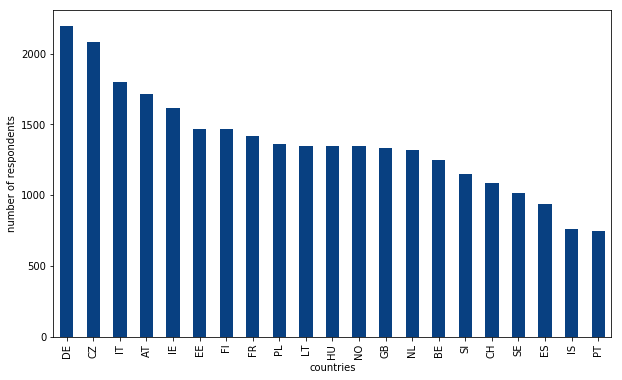

In [108]:
# the number count on each country
plt.figure(figsize=(10,6))
plt.ylabel("number of respondents")
plt.xlabel("countries")
df['cntry'].value_counts().plot.bar(colormap= 'GnBu_r' )

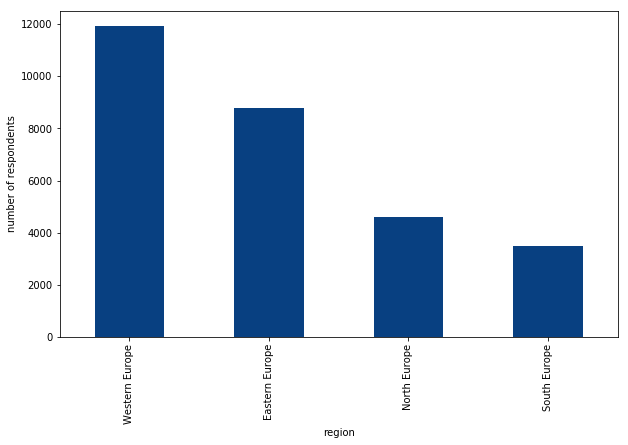

In [109]:
# the number count for each region
plt.figure(figsize=(10,6))
plt.ylabel("number of respondents")
plt.xlabel("region")
df['region'].value_counts().plot.bar(colormap= 'GnBu_r' )

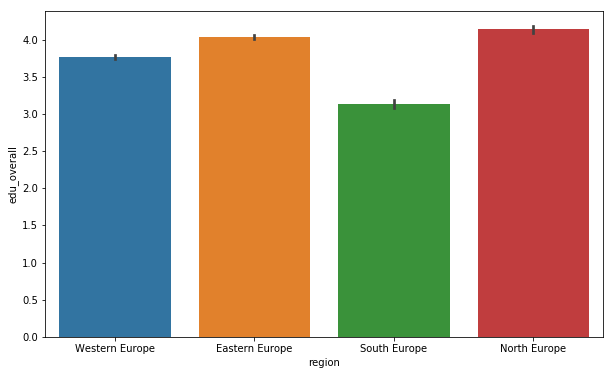

In [110]:
# the plot on overall education level on different regions
plt.figure(figsize=(10,6))
plt.ylabel("number of respondents")
plt.xlabel("region")
g = sns.barplot(x = "region", y = "edu_overall",data=df)

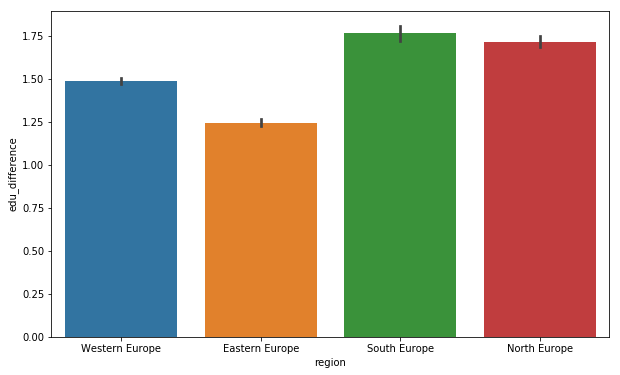

In [111]:
# the plot on mobility on different regions
plt.figure(figsize=(10,6))
plt.ylabel("number of respondents")
plt.xlabel("region")
g = sns.barplot(x = "region", y = "edu_difference",data=df)

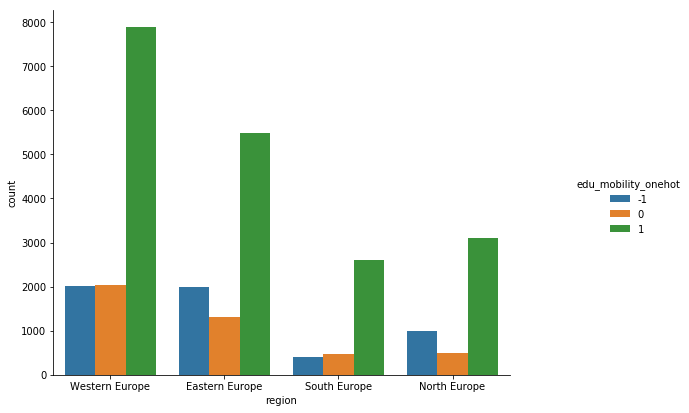

In [117]:
# the plot on mobility on different regions
g = sns.catplot("region",data=df,hue="edu_mobility_onehot",kind="count")
g.fig.set_size_inches(10,6)

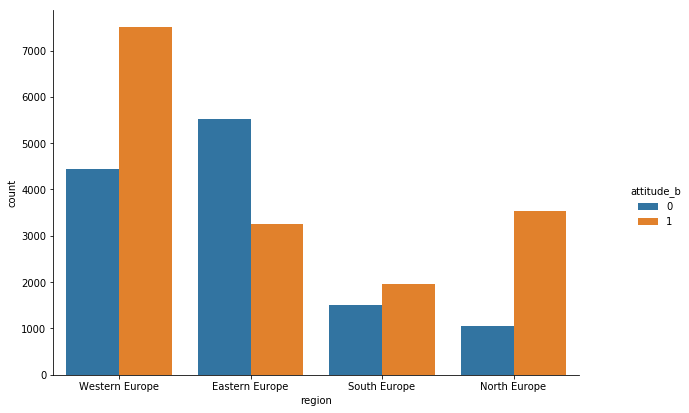

In [118]:
# the plot on attitude towards immigrants on different regions
g = sns.catplot("region",data=df,hue="attitude_b",kind="count")
g.fig.set_size_inches(10,6)

## data preparation for DMM model(in Stata)

In [160]:
#finally adjust the education mobility into dummy variables
edu_up = []
edu_down = []
for i in df['edu_mobility']:
    if i>0:
        edu_up.append(1)
        edu_down.append(0)
    elif i<0:
        edu_up.append(0)
        edu_down.append(1)
    else:
        edu_up.append(0)
        edu_down.append(0)

df['edu_up'] = edu_up
df['edu_down'] = edu_down
        

In [161]:
df.head()


,name,essround,edition,cntry,gndr,yrbrn,rlgblg,ctzcntr,edulvlb,edulvlfb,...,edu_overall,edu_difference,edu_mobility,attitude_lv,edu_lvp,attitude_b,region,edu_mobility_onehot,edu_up,edu_down
2,ESS8e02_1,8,2.1,AT,0.0,1948,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,3.00,2.0,1.50,-1.0,2.50,0,Western Europe,1,1,0
6,ESS8e02_1,8,2.1,AT,0.0,1964,0.0,Yes,"General/pre-vocational ISCED 2A/2B, access ISC...","General/pre-vocational ISCED 2A/2B, access ISC...",...,2.00,1.0,0.75,1.0,1.75,1,Western Europe,1,1,0
7,ESS8e02_1,8,2.1,AT,0.0,1972,1.0,Yes,"Vocational ISCED 4A, access upper tier ISCED 5...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,4.25,0.5,0.75,-4.0,4.00,0,Western Europe,1,1,0
8,ESS8e02_1,8,2.1,AT,0.0,1994,0.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","Vocational ISCED 3A, access ISCED 5B/ lower ti...",...,4.00,0.0,0.00,8.0,4.00,1,Western Europe,0,0,0
9,ESS8e02_1,8,2.1,AT,0.0,1975,1.0,Yes,"Vocational ISCED 3A, access ISCED 5B/ lower ti...","General/pre-vocational ISCED 2A/2B, access ISC...",...,3.00,1.0,1.50,7.0,2.50,1,Western Europe,1,1,0


In [162]:
df.columns


Index(['name', 'essround', 'edition', 'cntry', 'gndr', 'yrbrn', 'rlgblg',
       'ctzcntr', 'edulvlb', 'edulvlfb', 'edulvlmb', 'imsmetn', 'impcntr',
       'imbgeco', 'imueclt', 'imwbcnt', 'age', 'edu_lv', 'edu_lvf', 'edu_lvm',
       'imsmetn_lv', 'impcntr_lv', 'imbgeco_lv', 'imueclt_lv', 'imwbcnt_lv',
       'edu_overall', 'edu_difference', 'edu_mobility', 'attitude_lv',
       'edu_lvp', 'attitude_b', 'region', 'edu_mobility_onehot', 'edu_up',
       'edu_down'],
      dtype='object')

In [164]:
df['edu_lv'] = np.round_(df['edu_lv'])

In [165]:
df['edu_lvp'] = np.round_(df['edu_lvp'])

In [166]:
df.to_csv('edu_data.csv')

In [167]:
df[df['region'] == 'Western Europe'].to_csv('edu_data_W.csv')

In [168]:
df[df['region'] == 'North Europe'].to_csv('edu_data_N.csv')

In [169]:
df[df['region'] == 'Eastern Europe'].to_csv('edu_data_E.csv')

In [170]:
df[df['region'] == 'South Europe'].to_csv('edu_data_S.csv')

In [171]:
df.columns

Index(['name', 'essround', 'edition', 'cntry', 'gndr', 'yrbrn', 'rlgblg',
       'ctzcntr', 'edulvlb', 'edulvlfb', 'edulvlmb', 'imsmetn', 'impcntr',
       'imbgeco', 'imueclt', 'imwbcnt', 'age', 'edu_lv', 'edu_lvf', 'edu_lvm',
       'imsmetn_lv', 'impcntr_lv', 'imbgeco_lv', 'imueclt_lv', 'imwbcnt_lv',
       'edu_overall', 'edu_difference', 'edu_mobility', 'attitude_lv',
       'edu_lvp', 'attitude_b', 'region', 'edu_mobility_onehot', 'edu_up',
       'edu_down'],
      dtype='object')

### opearte on stata

In [120]:
#open the STATA 
#separately import data from each region
#enter the code --'drm attitude_b edu_lv edu_lvp edu_mobility age gndr rlgblg, link(logit)'